# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?

### Risposta
In questo esercizio ho implementato l'algoritmo di **Metropolis** per il campionameto di una qualsiasi distribuzione di probabilità $p(\vec{x})$.
Data un posizione $\vec{y}$ nello spazio di campionamento, viene proposto uno spostamento verso la posizione $\vec{x}$ secondo una certa distribuzione di **probabilità di transizione** $T(\vec{x}|\vec{y})$. La probabilità che tale spostamento nello spazio di campionamento venga accettato è data da:
$$p(\vec{x}|\vec{y})=\min{\left(1,\frac{p(\vec{x})T(\vec{x}|\vec{y})}{p(\vec{y})T(\vec{y}|\vec{x})}\right)}$$
Nel momento in cui la probabilità è assunta simmetrica $T(\vec{x}|\vec{y})=T(\vec{y}|\vec{x})$ la probabilità di accettare la mossa risulta più semplicemente:
$$p(\vec{x}|\vec{y})=\min{\left(1,\frac{p(\vec{x})}{p(\vec{y})}\right)}$$
Ad ogni step, di conseguenza, viene proposto uno spostamento che può essere accettato o meno con una probabilità che segue la distribuzione di probabilità stessa che si vuole campionare. Tale distribuzione in generale può avere un profilo molto frastagliato e con diversi minimi locali; al fine di evitare un campionamento selettivo attorno ad un minimo locale è convenzione imporre una probabilità di transizione $T(\vec{x}|\vec{y})$ che sia tale da avere un'**Accettanza** pari circa al $50\%$. Ciò permette di seguire effettivamente il profilo della distribuzione $p(\vec{x})$ senza però campionare una regione limitata dello spazio andando a proporre talvolta spostamenti molto ampi.


Vengono riportati sotto gli esiti delle misure con datablocking di $\langle r\rangle/a_0$ delle funzioni d'onda di atomo di Idrogeno nello stato fondamentale $\psi_{1,0,0}$ e nello stato eccitato $\psi_{2,1,0}$. È interessate notare l'usuale andamento della blocking average e del relativo errore nel caso in cui il campionamento delle due funzioni d'onda cominci dalla posizione $(0,0,0)$ che è invece apparentemente alterato se si comincia a campionare dalla posizione $(100,0,0)$.

È stato riportato nel secondo caso l'andamento del valor medio nei blocchi che mette in luce come le misure dei primi blocchi alterino la blocking average globale. Questi primi blocchi sono quindi da considerare come degli step di equilibrazione necessari per migrare verso la regione dell'origine dove si sviluppano gli orbitali atomici, ovvero dove la distribuzione di probabilità assume dei valori notevoli. A partire dal $10º$ blocco in poi i valori medi dei blocchi oscillano intorno al valore di aspettazione

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [8.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
    'savefig.directory':'./Images'
})

In [80]:
# 1 0 0
ng1 = np.loadtxt('Near/gauss_100.txt',delimiter='\t',skiprows=1)
nu1 = np.loadtxt('Near/unif_100.txt',delimiter='\t',skiprows=1)
fg1 = np.loadtxt('Far/gauss_100.txt',delimiter='\t',skiprows=1)
fu1 = np.loadtxt('Far/unif_100.txt',delimiter='\t',skiprows=1)
# 2 1 0
ng2 = np.loadtxt('Near/gauss_210.txt',delimiter='\t',skiprows=1)
nu2 = np.loadtxt('Near/unif_210.txt',delimiter='\t',skiprows=1)
fg2 = np.loadtxt('Far/gauss_210.txt',delimiter='\t',skiprows=1)
fu2 = np.loadtxt('Far/unif_210.txt',delimiter='\t',skiprows=1)


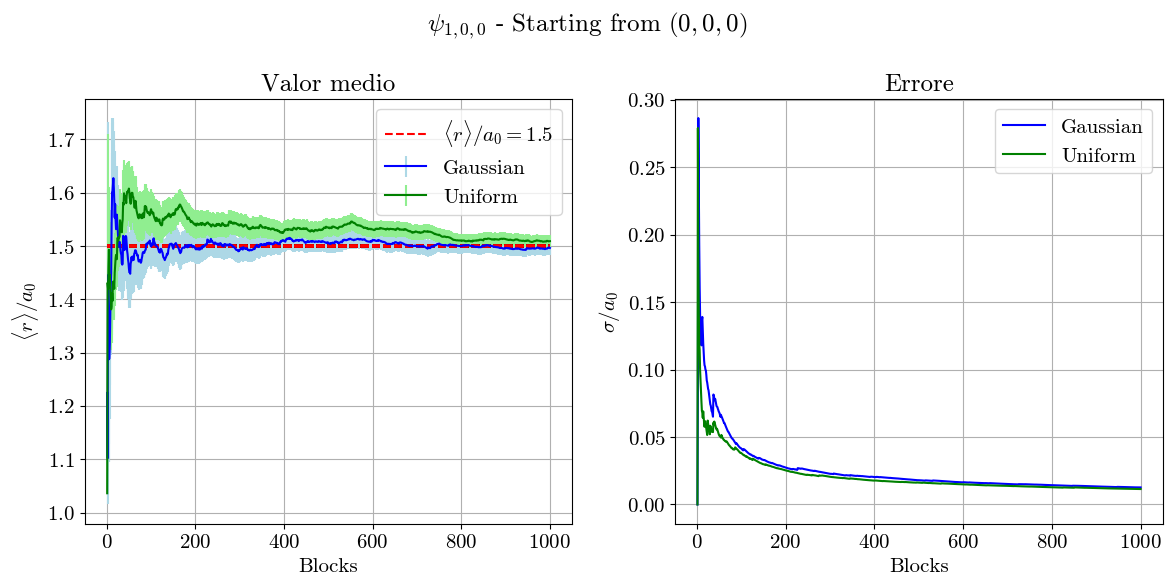

In [90]:
x=ng1[:,0]
y=ng1[:,2]
err=ng1[:,3]
x1=nu1[:,0]
y1=nu1[:,2]
err1=nu1[:,3]
target = np.ones(len(x))*1.5
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.errorbar(x,y,err,color='blue',ecolor='lightblue',label='Gaussian')
plt.errorbar(x1,y1,err1,color='g',ecolor='lightgreen',label='Uniform')
plt.hlines(target,0,x[-1],linestyles='--',color='r',label='$\langle r\\rangle/a_0 = 1.5$')
plt.xlabel('Blocks')
plt.ylabel('$\langle r\\rangle/a_0$')
plt.title('Valor medio')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(x,err,color='blue',label='Gaussian')
plt.plot(x1,err1,color='g',label='Uniform')
plt.xlabel('Blocks')
plt.ylabel('$\sigma/a_0$')
plt.title('Errore')
plt.legend()
plt.grid()

plt.suptitle('$\psi_{1,0,0}$ - Starting from $(0,0,0)$')
plt.tight_layout()
plt.show()

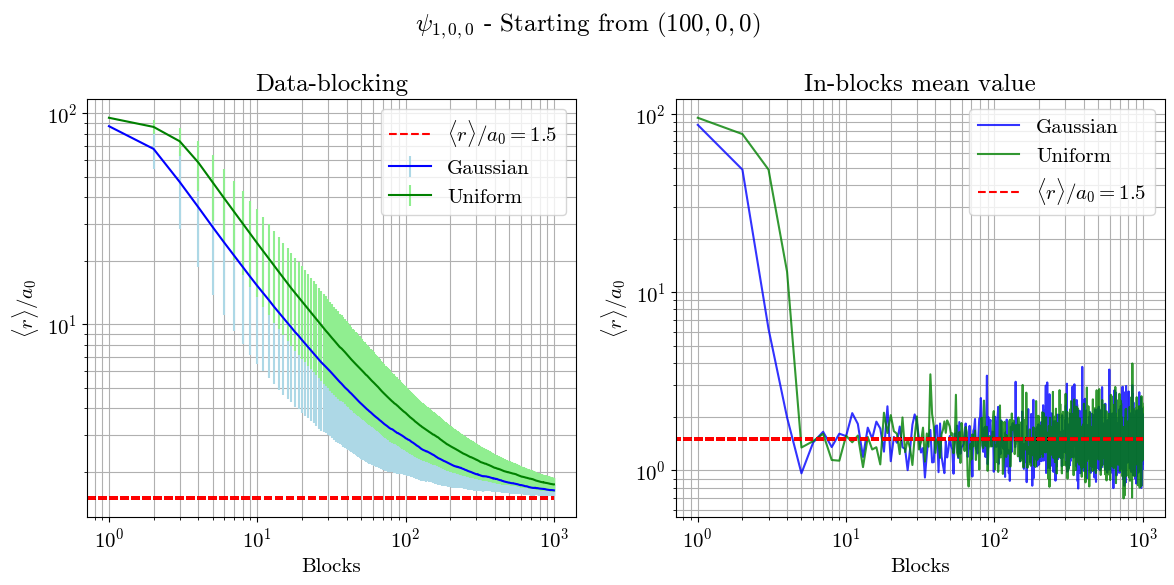

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
x=fg1[:,0]
y=fg1[:,2]
err=fg1[:,3]
x1=fu1[:,0]
y1=fu1[:,2]
err1=fu1[:,3]
plt.errorbar(x,y,err,color='blue',ecolor='lightblue',label='Gaussian')
plt.errorbar(x1,y1,err1,color='g',ecolor='lightgreen',label='Uniform')
plt.hlines(target,0,x[-1],linestyles='--',color='r',label='$\langle r\\rangle/a_0 = 1.5$')
plt.xlabel('Blocks')
plt.ylabel('$\langle r\\rangle/a_0$')
plt.title('Data-blocking')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True,which='both')
plt.subplot(1,2,2)
x=fg1[:,0]
y=fg1[:,1]
err=fg1[:,3]
x1=fu1[:,0]
y1=fu1[:,1]
err1=fu1[:,3]
plt.plot(x,y,color='blue',label='Gaussian',alpha=0.8)
plt.plot(x1,y1,color='g',label='Uniform',alpha=0.8)
plt.hlines(target,0,x[-1],linestyles='--',color='r',label='$\langle r\\rangle/a_0 = 1.5$')
plt.xlabel('Blocks')
plt.ylabel('$\langle r\\rangle/a_0$')
plt.title('In-blocks mean value')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True,which='both')
plt.suptitle('$\psi_{1,0,0}$ - Starting from $(100,0,0)$')
plt.tight_layout()
plt.show()

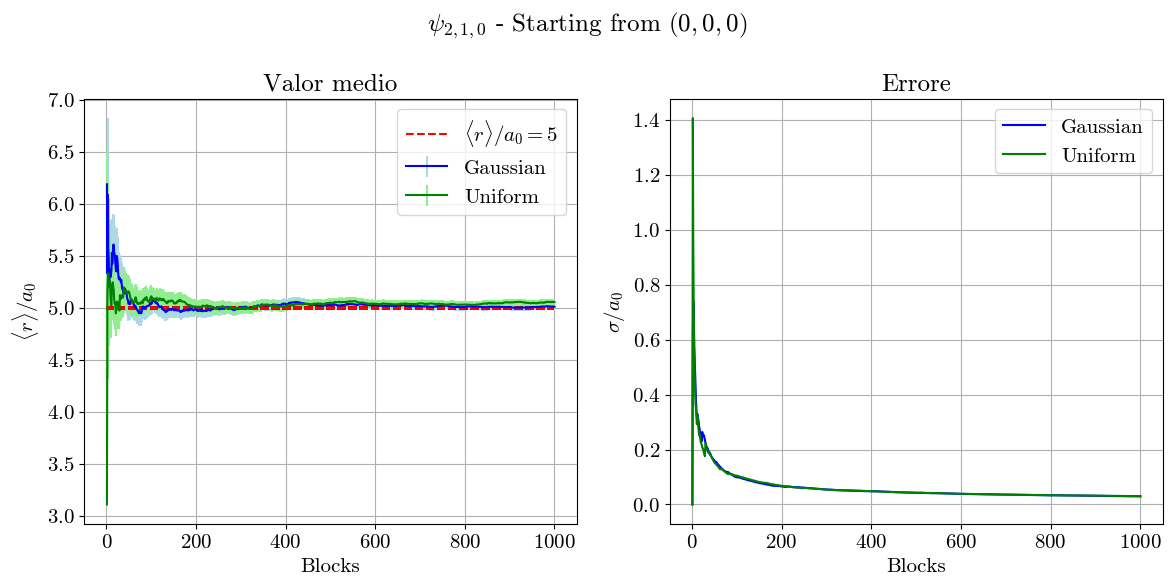

In [88]:
x=ng2[:,0]
y=ng2[:,2]
err=ng2[:,3]
x1=nu2[:,0]
y1=nu2[:,2]
err1=nu2[:,3]
target = np.ones(len(x))*5
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.errorbar(x,y,err,color='blue',ecolor='lightblue',label='Gaussian')
plt.errorbar(x1,y1,err1,color='g',ecolor='lightgreen',label='Uniform')
plt.hlines(target,0,x[-1],linestyles='--',color='r',label='$\langle r\\rangle/a_0 = 5$')
plt.xlabel('Blocks')
plt.ylabel('$\langle r\\rangle/a_0$')
plt.title('Valor medio')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(x,err,color='blue',label='Gaussian')
plt.plot(x1,err1,color='g',label='Uniform')
plt.xlabel('Blocks')
plt.ylabel('$\sigma/a_0$')
plt.title('Errore')
plt.legend()
plt.grid()

plt.suptitle('$\psi_{2,1,0}$ - Starting from $(0,0,0)$')
plt.tight_layout()
plt.show()

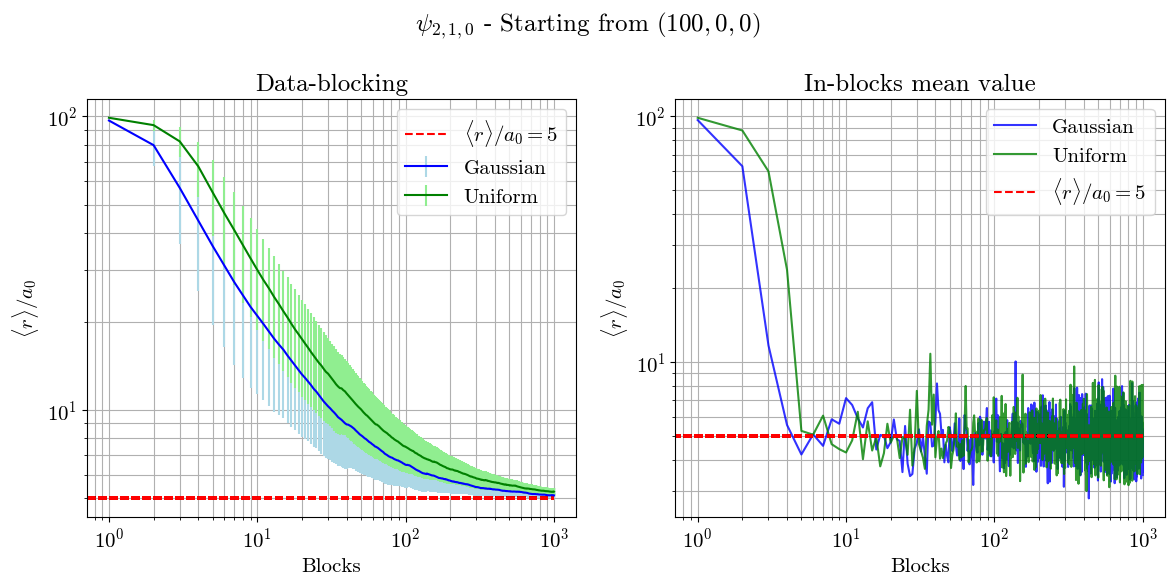

In [89]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
x=fg2[:,0]
y=fg2[:,2]
err=fg2[:,3]
x1=fu2[:,0]
y1=fu2[:,2]
err1=fu2[:,3]
plt.errorbar(x,y,err,color='blue',ecolor='lightblue',label='Gaussian')
plt.errorbar(x1,y1,err1,color='g',ecolor='lightgreen',label='Uniform')
plt.hlines(target,0,x[-1],linestyles='--',color='r',label='$\langle r\\rangle/a_0 = 5$')
plt.xlabel('Blocks')
plt.ylabel('$\langle r\\rangle/a_0$')
plt.title('Data-blocking')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True,which='both')
plt.subplot(1,2,2)
x=fg2[:,0]
y=fg2[:,1]
err=fg2[:,3]
x1=fu2[:,0]
y1=fu2[:,1]
err1=fu2[:,3]
plt.plot(x,y,color='blue',label='Gaussian',alpha=0.8)
plt.plot(x1,y1,color='g',label='Uniform',alpha=0.8)
plt.hlines(target,0,x[-1],linestyles='--',color='r',label='$\langle r\\rangle/a_0 = 5$')
plt.xlabel('Blocks')
plt.ylabel('$\langle r\\rangle/a_0$')
plt.title('In-blocks mean value')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True,which='both')
plt.suptitle('$\psi_{2,1,0}$ - Starting from $(100,0,0)$')
plt.tight_layout()
plt.show()

Parametri dei plot:
- $10^3$ blocchi da $10^2$ step

### Codice
Nella mia implementazione del codice ho definito una classe `metropolis` che tra i suoi data membri presenta una `funzione distr` che rappresenta la distribuzione di probabilità $p(\vec{x})$ e una `string _type` che codifica per la distribuzione $T(\vec{x}|\vec{y})$ che nel caso specifico di questo esercizio può essere `"unif"` o `"gauss"`. Il cuore della classe `metropolis` è il metodo `move()` che propone l'evoluzione della posizione, avente la struttura di un `arma::vec`.

Un'altra classe centrale che ho implementato a partire da questo esercizio è la classe virtuale `datablocking` con i suoi principali metodi `datablocking::blocks()` e `datablocking::averages()`. A seconda della necessità viene definita una **classe figlia** che eredita questi metodi e li specializza principalmente con l'implementazione dei propri metodi `increase()` e `adjust()` in cui vengono eseguite le operazioni specifiche che distinguono un tipo di datablocking da un altro e che agiscono all'interno dei metodi `blocks()` e `averages()`.

Nel caso specifico di questa esercitazione ho implementato la classe figlia `prova` a cui viene aggiunto un data membro `metropolis _metro` il cui metodo `metropolis::move()` agisce all'interno di `metropolis::increase()`. Di particolare interesse è il metodo `metropolis::adjust()` che agisce nell'omonimo metodo della classe `prova`. Questo metodo è volto al mantenimento attorno al $50\%$ dell'accettanza e agisce aggiustando l'ampiezza della distribuzione di probabilità di transizione $T(\vec{x}|\vec{y})$ allargandone il raggio di azione quando l'accettanza è troppo elevata o viceversa restringendola:
```cpp
void metropolis::adjust(){
    // riscalo la \sigma della funzione di transizione in modo da avere accettanza al 50%
    sigma*=((double)accepted)/((double)tried*0.5);
    tried=0; accepted=0;
};
```